In [0]:
# Utill fns for bigquery
from os import path

from google.cloud import bigquery
from google.oauth2 import service_account
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
#from scipy.stats import shapiro
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from google.cloud import bigquery
from google.oauth2 import service_account
import sys
from os import path

In [3]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
project_id = 'nimble-valve-257105'

In [0]:
start_date='2020-01-12'
end_date='2020-01-13'

In [0]:
#Query and query_parameters
query1 = """
Select 
  TIMESTAMP(l.CloseTime) as `TimeStamp`,
  t.Account,t.Destination,t.Fee,t.TxnSignature,t.AmountXRP,t.LedgerIndex,t.TransactionType
FROM
  `xrpledgerdata.fullhistory.transactions`t
JOIN
  `xrpledgerdata.fullhistory.ledgers` l
  on t.LedgerIndex=l.LedgerIndex
where t.TransactionResult = "tesSUCCESS"

AND TIMESTAMP(l.CloseTime) >=TIMESTAMP(@start_date)
AND TIMESTAMP(l.CloseTime) <=TIMESTAMP(@end_date)


ORDER BY TimeStamp

LIMIT 10000000

"""
query_params1 = [
    bigquery.ScalarQueryParameter("start_date", "STRING", start_date),
    bigquery.ScalarQueryParameter("end_date", "STRING", end_date)
]

In [0]:
from google.colab import auth
auth.authenticate_user()
client = bigquery.Client(project=project_id)
#client = bigquery.Client()
client

job_config = bigquery.QueryJobConfig()
job_config.query_parameters = query_params1


In [0]:
a = client.query(query1, job_config=job_config).to_dataframe()

In [9]:
a

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType
0,2020-01-12 00:00:00+00:00,rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,None,12,3045022100E51C1694500BC3318D71E9C4DC410E9715A6...,NaN,52675682,OfferCreate
1,2020-01-12 00:00:00+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,3045022100B3EA63F2A796613E6D9E5E7D7F9876C94FA6...,NaN,52675682,OfferCreate
2,2020-01-12 00:00:00+00:00,rh3VLyj1GbQjX7eA15BwUagEhSrPHmLkSR,None,12,30440220582FE6BB6437ED3BF01F24D8C6F4D90067F475...,NaN,52675682,OfferCreate
3,2020-01-12 00:00:00+00:00,rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,None,12,30450221009A820F3953AB59449FF2D8EF41CA4AF382E8...,NaN,52675682,OfferCreate
4,2020-01-12 00:00:00+00:00,rh3VLyj1GbQjX7eA15BwUagEhSrPHmLkSR,None,12,3045022100A0FAF526BB3111E23A1EB0C2272BCF27EA3F...,NaN,52675682,OfferCreate
...,...,...,...,...,...,...,...,...
675219,2020-01-13 00:00:00+00:00,rJumr5e1HwiuV543H7bqixhtFreChWTaHH,None,12,3044022041130F965F3D93C870C722A06C6FAF6A25E356...,NaN,52698239,OfferCreate
675220,2020-01-13 00:00:00+00:00,rMBzp8CgpE441cp5PVyA9rpVV7oT8hP3ys,None,10,3045022100CFF942AC30645EF13E11C6627F5EF253E5B4...,NaN,52698239,OfferCreate
675221,2020-01-13 00:00:00+00:00,rJumr5e1HwiuV543H7bqixhtFreChWTaHH,None,12,3044022001E4BA09134D4E13D4E7A97249053194D62E9D...,NaN,52698239,OfferCreate
675222,2020-01-13 00:00:00+00:00,rJumr5e1HwiuV543H7bqixhtFreChWTaHH,None,12,3043021F7DE0CAB562FA80A43BD29071404B85E3BD6393...,NaN,52698239,OfferCreate


In [10]:
a['TransactionType'].value_counts()

OfferCreate      619905
Payment           41813
OfferCancel       12771
AccountSet          612
TrustSet            116
SetRegularKey         4
EscrowCreate          1
SignerListSet         1
EscrowCancel          1
Name: TransactionType, dtype: int64

In [11]:
a.isnull().sum()

TimeStamp               0
Account                 0
Destination        633410
Fee                     0
TxnSignature         1797
AmountXRP          646551
LedgerIndex             0
TransactionType         0
dtype: int64

In [12]:
a[1:50]

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType
1,2020-01-12 00:00:00+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,3045022100B3EA63F2A796613E6D9E5E7D7F9876C94FA6...,NaN,52675682,OfferCreate
2,2020-01-12 00:00:00+00:00,rh3VLyj1GbQjX7eA15BwUagEhSrPHmLkSR,None,12,30440220582FE6BB6437ED3BF01F24D8C6F4D90067F475...,NaN,52675682,OfferCreate
3,2020-01-12 00:00:00+00:00,rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,None,12,30450221009A820F3953AB59449FF2D8EF41CA4AF382E8...,NaN,52675682,OfferCreate
4,2020-01-12 00:00:00+00:00,rh3VLyj1GbQjX7eA15BwUagEhSrPHmLkSR,None,12,3045022100A0FAF526BB3111E23A1EB0C2272BCF27EA3F...,NaN,52675682,OfferCreate
5,2020-01-12 00:00:00+00:00,rh3VLyj1GbQjX7eA15BwUagEhSrPHmLkSR,None,12,3045022100F6EE598D97A0C632AE21CE16A211331888A4...,NaN,52675682,OfferCreate
6,2020-01-12 00:00:00+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,3044022041070A465F6DFF7C410C494E02A82B30DFA698...,NaN,52675682,OfferCreate
7,2020-01-12 00:00:00+00:00,rGHFFeKYxzLciBVSkrAX7LKBfZXeyjAbDg,None,12,304402203421A23126A61C424BB6E0823C7D728222715C...,NaN,52675682,OfferCancel
8,2020-01-12 00:00:00+00:00,rh3VLyj1GbQjX7eA15BwUagEhSrPHmLkSR,None,12,304402205D49415DFD55A57DB0D95F228A96E89E608DBC...,NaN,52675682,OfferCreate
9,2020-01-12 00:00:00+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,304402205F8D410AF8344323748D88090261003985A551...,NaN,52675682,OfferCreate
10,2020-01-12 00:00:00+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,30440220564532D815EB1B6479BCA3996C8671554B513E...,NaN,52675682,OfferCreate


In [13]:
a.groupby(['LedgerIndex']).count()


,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,TransactionType
LedgerIndex,,,,,,,
52675682,13,13,0,13,13,0,13
52675683,27,27,1,27,27,1,27
52675684,28,28,1,28,28,1,28
52675685,25,25,0,25,25,0,25
52675686,24,24,0,24,24,0,24
...,...,...,...,...,...,...,...
52698235,26,26,1,26,26,1,26
52698236,27,27,1,27,27,1,27
52698237,30,30,0,30,30,0,30


In [14]:
massimo=a.groupby(['LedgerIndex']).count().Account
massimo.max()

181

In [15]:
massimo.idxmax()

52688516

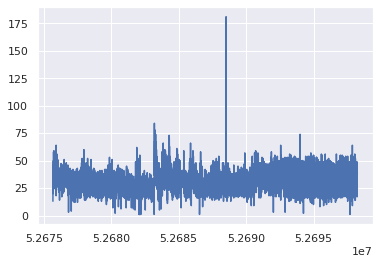

In [16]:
plt.plot(a.groupby(['LedgerIndex']).TimeStamp.count())

In [0]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [18]:
mean_confidence_interval(a.groupby(['LedgerIndex']).TimeStamp.count(),confidence=0.99)

(29.954041345044804, 29.82861651258444, 30.079466177505168)

In [22]:
a.groupby(['LedgerIndex']).count().sort_values(by=['TimeStamp'], ascending=False)[0:20]

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,TransactionType
LedgerIndex,,,,,,,
52688516,181,181,181,181,181,4,181
52688518,171,171,149,171,171,2,171
52688519,153,153,130,153,153,0,153
52688515,148,148,129,148,148,0,148
52688514,103,103,103,103,103,0,103
52683200,84,84,2,84,84,2,84
52683202,84,84,2,84,84,1,84
52683231,78,78,2,78,78,2,78
52694004,74,74,22,74,74,5,74


In [23]:
a.groupby(['LedgerIndex']).count().sort_values(by=['Destination'], ascending=False)[0:20]

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,TransactionType
LedgerIndex,,,,,,,
52688516,181,181,181,181,181,4,181
52688518,171,171,149,171,171,2,171
52688519,153,153,130,153,153,0,153
52688515,148,148,129,148,148,0,148
52688514,103,103,103,103,103,0,103
52688513,56,56,55,56,56,0,56
52681896,62,62,38,62,62,38,62
52693687,47,47,24,47,47,4,47
52694193,50,50,24,50,50,4,50


In [21]:
a.groupby(['Account']).count().sort_values(by=['Destination'], ascending=False)[0:50]

,TimeStamp,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType
Account,,,,,,,
rUtCyL45mkqkSqvnoGMHJsqopmrAr1azDa,10456,10456,10456,10456,10456,10456,10456
rAPERVgXZavGgiGv6xBgtiZurirW2yAmY,3539,3539,3539,3539,3539,3539,3539
rna3REBtXdafS8izdZBx86bQUsT96GFpNT,1798,1795,1798,1798,0,1798,1798
rpKj9aiBUtC1TSfVDxYU9hAeodwxUcCjxy,1744,1739,1744,1744,0,1744,1744
rw2ciyaNshpHe7bCHo4bRWq6pqqynnWKQg,1390,1390,1390,1390,1390,1390,1390
rJb5KsHsDHF1YS5B5DU6QCkH5NsPaKQTcy,1340,1340,1340,1340,1340,1340,1340
rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w,1246,1246,1246,1246,1246,1246,1246
rU2mEJSLqBRkYLVTv55rFTgQajkLTnT6mA,1075,1075,1075,0,1075,1075,1075
rGvFAsDiR8jpNsxv7JoydBbKYZMxYEdSno,664,660,664,664,0,664,664


In [0]:
a.groupby(['Account']).count().sort_values(by=['Destination'], ascending=False)[0:50].to_csv(r'Path where you want to store the exported CSV file\File Name.csv')

I'm now starting to use Ravi's function to call different queries

In [0]:
def gbq_query(query, query_params=None):
    """
    Run a query against Google Big Query, returning a pandas dataframe of the result.

    Parameters
    ----------
    query: str
        The query string
    cred: obj
        Credential class instance
    
    query_params: list, optional
        The query parameters to pass into the query string
    """
    client = bigquery.Client(project=project_id)
    job_config = bigquery.QueryJobConfig()
    job_config.query_parameters = query_params
    return client.query(query, job_config=job_config).to_dataframe()

In [0]:
#Query and query_parameters
query2 = """
Select 
  TIMESTAMP(l.CloseTime) as `TimeStamp`,
  t.Account,t.Destination,t.Fee,t.TxnSignature,t.AmountXRP,t.LedgerIndex,t.TransactionType
FROM
  `xrpledgerdata.fullhistory.transactions`t
JOIN
  `xrpledgerdata.fullhistory.ledgers` l
  on t.LedgerIndex=l.LedgerIndex
where t.TransactionResult = "tesSUCCESS"
AND TxnSignature IS NOT NULL
AND Destination IS NOT NULL
AND AmountXRP  IS NOT NULL
AND TIMESTAMP(l.CloseTime) >=TIMESTAMP(@start_date)
AND TIMESTAMP(l.CloseTime) <=TIMESTAMP(@end_date)


ORDER BY TimeStamp

LIMIT 10000000

"""
query_params2 = [
    bigquery.ScalarQueryParameter("start_date", "STRING", start_date),
    bigquery.ScalarQueryParameter("end_date", "STRING", end_date)
]

In [0]:
b = gbq_query(query2,query_params1)

In [50]:
b

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType
0,2020-01-15 00:00:00+00:00,rEVrb2XPMxs3Wq1zKgFaYZers9nKCWUNd5,rDxfhNRgCDNDckm45zT5ayhKDC4Ljm7UoP,15,3045022100FF47F5970590FA693BBA1A73B5813B210BFE...,3999000000,52743117,Payment
1,2020-01-15 00:00:00+00:00,rPsmHDMkheWZvbAkTA8A9bVnUdadPn7XBK,raQwCVAJVqjrVm1Nj5SFRcX8i22BhdC9WA,10,3045022100EF250BBB0FC8CFA495B662FF899F58FCEC2C...,300000000000,52743117,Payment
2,2020-01-15 00:00:00+00:00,raQwCVAJVqjrVm1Nj5SFRcX8i22BhdC9WA,rEVrb2XPMxs3Wq1zKgFaYZers9nKCWUNd5,1000,304402201C6156E32F9D789EE91B152E1831239C98F472...,178135179070,52743117,Payment
3,2020-01-15 00:00:01+00:00,rLHtvB1kZimYJsDCqCX4iQxRtSAqqFtrA7,rEb8TK3gBgk5auZkwc6sHnwrGVJH8DuaLh,10,3045022100FFC811F41C845C96FB2434D72C7774DA7699...,4046000000,52743118,Payment
4,2020-01-15 00:00:01+00:00,rw2ciyaNshpHe7bCHo4bRWq6pqqynnWKQg,rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w,40,304402200DC43FCDE41BA0C9446F66A5CB2B64C659E1C4...,938193373,52743118,Payment
...,...,...,...,...,...,...,...,...
45732,2020-01-15 23:59:42+00:00,rK7LSKygRUu9y9xcuhkWbcMRKRF5HVWwVL,rU2mEJSLqBRkYLVTv55rFTgQajkLTnT6mA,100000,3045022100B5313BE0AE3CB25649AA01B095373ADEA688...,45859461,52765288,Payment
45733,2020-01-15 23:59:42+00:00,r4eEbLKZGbVSBHnSUBZW8i5XaMjGLdqT4a,r9KM11Pmc7iBQaPDFgrPMfnkUsX6cS93rp,6000,30440220191F9077A6E7C1ED0585E82DB39FE1CCAE0AC6...,1090115351,52765288,Payment
45734,2020-01-15 23:59:51+00:00,rPVMhWBsfF9iMXYj3aAzJVkPDTFNSyWdKy,rU7xJs7QmjbiyxpEozNYUFQxaRD5kueY7z,12,30440220214F0D1D0B668048CE0DC8EDA7BC817F3ED598...,534100584,52765290,Payment
45735,2020-01-15 23:59:51+00:00,r4eEbLKZGbVSBHnSUBZW8i5XaMjGLdqT4a,rEb8TK3gBgk5auZkwc6sHnwrGVJH8DuaLh,6000,30440220156AD82DC77B5731D044C301119A330F3DC8CE...,107776620000,52765290,Payment


In [51]:
b['TransactionType'].value_counts()

Payment    45737
Name: TransactionType, dtype: int64